# Decision Trees
#### Part of the [Inquiryum Machine Learning Fundamentals Course](http://inquiryum.com/machine-learning/)


Let's get some important stuff out of the way. Here are the advantages and disadvantages of decision trees:

### advantages

1. When it classifies an instance you can ask *why*. Most machine learning techniques are called **black box models** which means that when it makes a decision you can't go inside and see how that decision was made.  For example, consider a task where we have 100 attributes and we are trying to predict whether someone has a particular kind of cancer. With an algorithm like Naive Bayes, which relies on probabilities, we can't ask "How did you come to the conclusion that this person will have cancer?" In contrast, decision trees can provide an answer to that question. 
2. It requires little data wrangling. We don't need to scale columns. It can handle missing data (although, not with the sklearn implementation)
4. Is fairly fast. The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

### disadvantages

1. Susceptible to overfitting the data. The training set is only a sample from some huge real world set (for example, even a training set of 1000 people who do and do not have diabetes, is tiny compared to all the people who do or do not have diabetes). The decision tree algorithm may add branches to the tree that improve performance for the instances in the dataset but decrease performance on the instances outside the dataset. This is the big wart on decision trees.
3. Learning the optimal decision tree is NP-complete. What this means is that the algorithm can create a pretty good classifier in a reasonable amount of time, but to create the very best classifier would take more time than there are grains of sand in the Ganges.


Let's get to a simple example. 

## Iris Dataset yet again
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1e/IMG_7911-Iris_virginica.jpg" width="250" />

Ok. Here is a very simple basic example. And we are going to use the Iris Dataset we used before.  As a reminder, the data set contains 3 classes of 50 instances each

1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica (the picture above)

There are only 4 attributes or features:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

Here is an example of the data:

Sepal Length|Sepal Width|Petal Length|Petal Width|Class
:--: | :--: |:--: |:--: |:--: 
5.3|3.7|1.5|0.2|Iris-setosa
5.0|3.3|1.4|0.2|Iris-setosa
5.0|2.0|3.5|1.0|Iris-versicolor
5.9|3.0|4.2|1.5|Iris-versicolor
6.3|3.4|5.6|2.4|Iris-virginica
6.4|3.1|5.5|1.8|Iris-virginica

The job of the classifier is to determine the class of an instance from the values of the attributes.

### Step 1: load the data

This dataset is so common that it is build into sklearn, but just for practice let's load our own csv file from

    https://raw.githubusercontent.com/zacharski/ml-class/master/data/iris.csv

In [1]:
 # you load it
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/zacharski/ml-class/master/data/iris.csv')
print(iris.describe())

       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### something new: splitting data into a training set and test set

When we used this Dataset before, I did some work for you. Namely, I divided the data into a training and test test. This time you loaded the entire dataset. With sklearn it is easy to divide a dataset into parts. Let's say I want to 80% of the data in the training set and 20 in the test set:

In [2]:
from sklearn.model_selection import train_test_split
iris_train, iris_test = train_test_split(iris, test_size = 0.2)
iris_train


Sepal Length  Sepal Width  Petal Length  Petal Width            Class
94            5.6          2.7           4.2          1.3  Iris-versicolor
41            4.5          2.3           1.3          0.3      Iris-setosa
116           6.5          3.0           5.5          1.8   Iris-virginica
105           7.6          3.0           6.6          2.1   Iris-virginica
77            6.7          3.0           5.0          1.7  Iris-versicolor
..            ...          ...           ...          ...              ...
104           6.5          3.0           5.8          2.2   Iris-virginica
123           6.3          2.7           4.9          1.8   Iris-virginica
6             4.6          3.4           1.4          0.3      Iris-setosa
121           5.6          2.8           4.9          2.0   Iris-virginica
126           6.2          2.8           4.8          1.8   Iris-virginica

[120 rows x 5 columns]



### Step 2: create a decision tree classifier
Now it is time to create a decision tree classifier using entropy:


In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')

### Step 3: train the classifier on the data:
(the arguments are the same as the knn classifier)


In [4]:
clf.fit(iris_train[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], iris_train['Class'])

DecisionTreeClassifier(criterion='entropy')


### Viewing our decision tree

In [5]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file="iris.dot", 
                         feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("iris.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

ModuleNotFoundError: No module named 'pydotplus'

Ok. that is cool.

When I did this the first few nodes of the tree looked like:

![](https://raw.githubusercontent.com/zacharski/ml-class/master/labs/pics/tree3.png)

Let's parse that out a bit. The first node looks like:

```
Petal Length <= 2.45
entropy = 1.583
samples=120
values = [37, 41, 42]
class = virginica
```
Let's skip the first line for a moment and look at the lines:

```
samples=120
values = [37, 41, 42]
```
The number of samples is 120. 37 of them are setosa, 41 are versicolor, and 42 are virginica. So if this is all the information you had to guess with, you would select virginica since most of the samples are virginica. that is how we get

```
class = virginica
```
From the samples and values lines we can calculate entropy, or info:

$$
info([37, 41, 42])=-\sum{37\over120}log_2{({37\over120})}+{41\over120}log_2{({41\over120})}+{42\over120}log_2{({42\over120})} = 1.583
$$

So the entropy of the node is 1.583.  

The first line contains the first question: is the petal length smaller or equal to 2.45. If that is true we follow the left link to the node:

```
entropy=0.0
samples=37
values=[37,0,0]
class = setosa
```

It turns out that 37 of the samples have a petal length less than or equal to 2.45 and all of them are setosa. If we get a new sample and its petal length is 2.37, we would classify it as setosa. 
Let's examine the node on the right:

```
Petal Length <= 1.75
entropy= 1.0
samples= 83
values=[0, 41, 42]
class = virginica
```
It turns out that 83 of the samples have a petal length greater than 2.45 (we are following the 'no' link) 

Look over the nodes of the tree you constructed to gain a good understanding of what a decision tree looks like.

That was a bit of an diversion (although, an important one) so let's recap.

#### step 1. we created a classifier

```
clf = tree.DecisionTreeClassifier(criterion='entropy')
```
#### step2. we trained the classifier on the data
```
clf.fit(iris_train[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], iris_train['Class'])
``` 
Once we fit our classifier to the data (i.e. we trained it) we can use the classifier to classifier samples. :et's try it on the test set:


In [16]:
iris_predictions = clf.predict(iris_test[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']])
from sklearn.metrics import accuracy_score
accuracy_score(iris_test['Class'], iris_predictions)
#, iris_train['Class'])

0.9333333333333333

Great! You should get 100% or near 100% accuracy on that small dataset.

### Adjusting Max Depth

The depth of a decision tree is how many rows of nodes there are excluding the root node. In the case of the tree above, the depth was likely to be 5. 

We can limit depth by using the `max_depth` parameter when we construct our DecisionTreeClassifier.

Let's try it with a max depth of 4

In [17]:
clf_maxdepth4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf_maxdepth4.fit(iris_train[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], iris_train['Class'])
iris_predictions = clf_maxdepth4.predict(iris_test[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']])
from sklearn.metrics import accuracy_score
accuracy_score(iris_test['Class'], iris_predictions)

0.9333333333333333

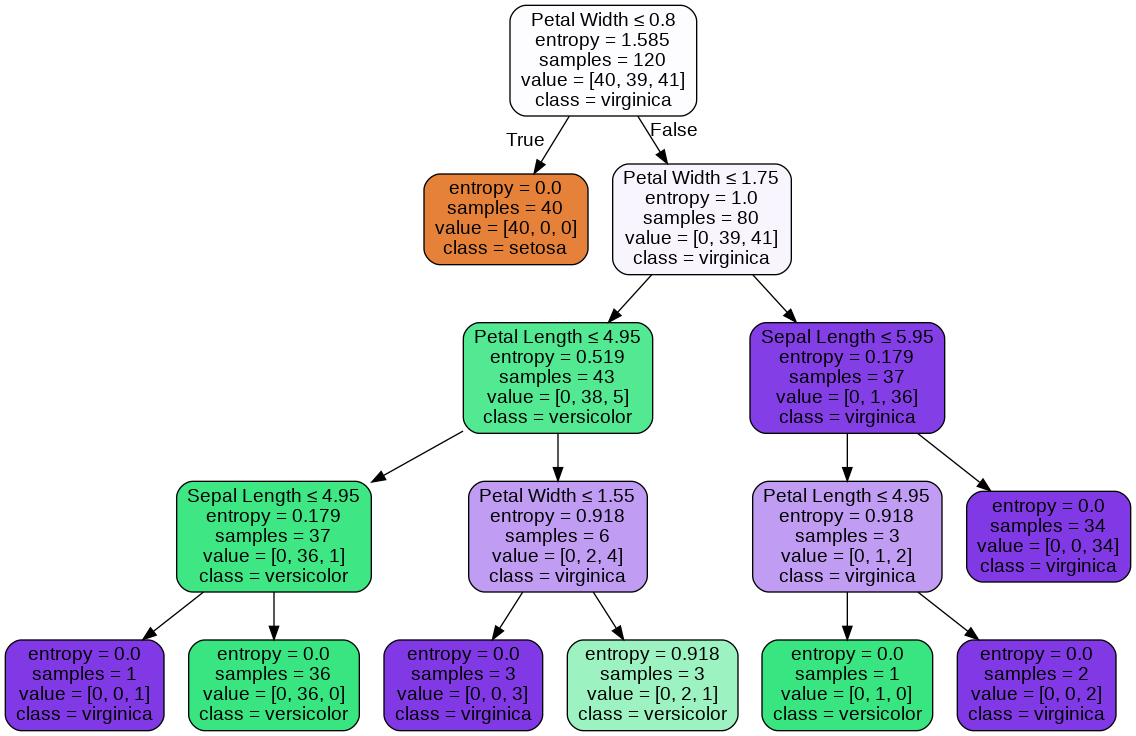

In [18]:
dot_data = tree.export_graphviz(clf_maxdepth4, out_file="iris4.dot", 
                         feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("iris4.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



## Part 1 - Pima  15xp

The Pima Indians Diabetes Data Set was developed by the
United States National Institute of Diabetes and Digestive and Kidney Diseases. 

Astonishingly, over 30% of Pima people develop diabetes. In contrast, the diabetes rate in
the United States is 8.3% and in China it is 4.2%.

Each instance in the dataset represents information about a Pima woman over the age of 21
and belonged to one of two classes: a person who developed diabetes within five years, or a
person that did not. There are eight attributes in addition to the column representing whether or not they developed diabetes:


1.  The number of times the woman was pregnant
2.  Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3.  Diastolic blood pressure (mm Hg)
4.  Triceps skin fold thickness (mm) 
5.  2-Hour serum insulin (mu U/ml) 
6.  Body mass index (weight in kg/(height in m)^2) 
7.  Diabetes pedigree function 
8.  Age
9.  Whether they got diabetes or not (0 = no, 1 = yes)


The csv file at  is at

    https://raw.githubusercontent.com/yew1eb/machine-learning/master/Naive-bayes/pima-indians-diabetes.data.csv
    
<span style="color:red">This file does not have a header row</span>

You will need to 

1. load the file into a dataframe
2. divide the data into training and test sets. (an 80-20 split sounds good)
3. train a decision tree classifier on the training data using 10 fold cross validation
3. Adjust the hyperparameters to create the most accurate classifier
3. display the tree
3. run the classifier on the test data
4. compute the accuracy



## Part 2 - Adult Dataset

Do the same using the [The Adult Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)

#### Important
Keep 20% of the data for testing. You should not use this data for validation. Remember, you train the model on the training model, you tune your model by computing the error on the validation set adjusting hyperparameters and repeat. When you are done tuning your model you finally evaluate it on the test set.


In [ ]:
# Pima
import pandas as pd
pima = pd.read_csv('https://raw.githubusercontent.com/yew1eb/machine-learning/master/Naive-bayes/pima-indians-diabetes.data.csv', 
                   header=None, names=['pregnant', 'glucose', 'bp', 'skinfold', 'insulin', 'bmi', 'pedigree', 'age', 'diabetes'])

In [ ]:
pima.head()
len(pima)
from sklearn.model_selection import train_test_split
pima_train, pima_test = train_test_split(pima, test_size = 0.2)


In [ ]:
from sklearn import tree
pima_clf = tree.DecisionTreeClassifier(criterion='entropy')
pima_clf.fit(pima_train[['pregnant', 'glucose', 'bp', 'skinfold', 'insulin', 'bmi', 'pedigree', 'age']], pima_train['diabetes'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
pima_predictions = pima_clf.predict(pima_test[['pregnant', 'glucose', 'bp', 'skinfold', 'insulin', 'bmi', 'pedigree', 'age']])
from sklearn.metrics import accuracy_score
accuracy_score(pima_test['diabetes'], pima_predictions)


0.7402597402597403

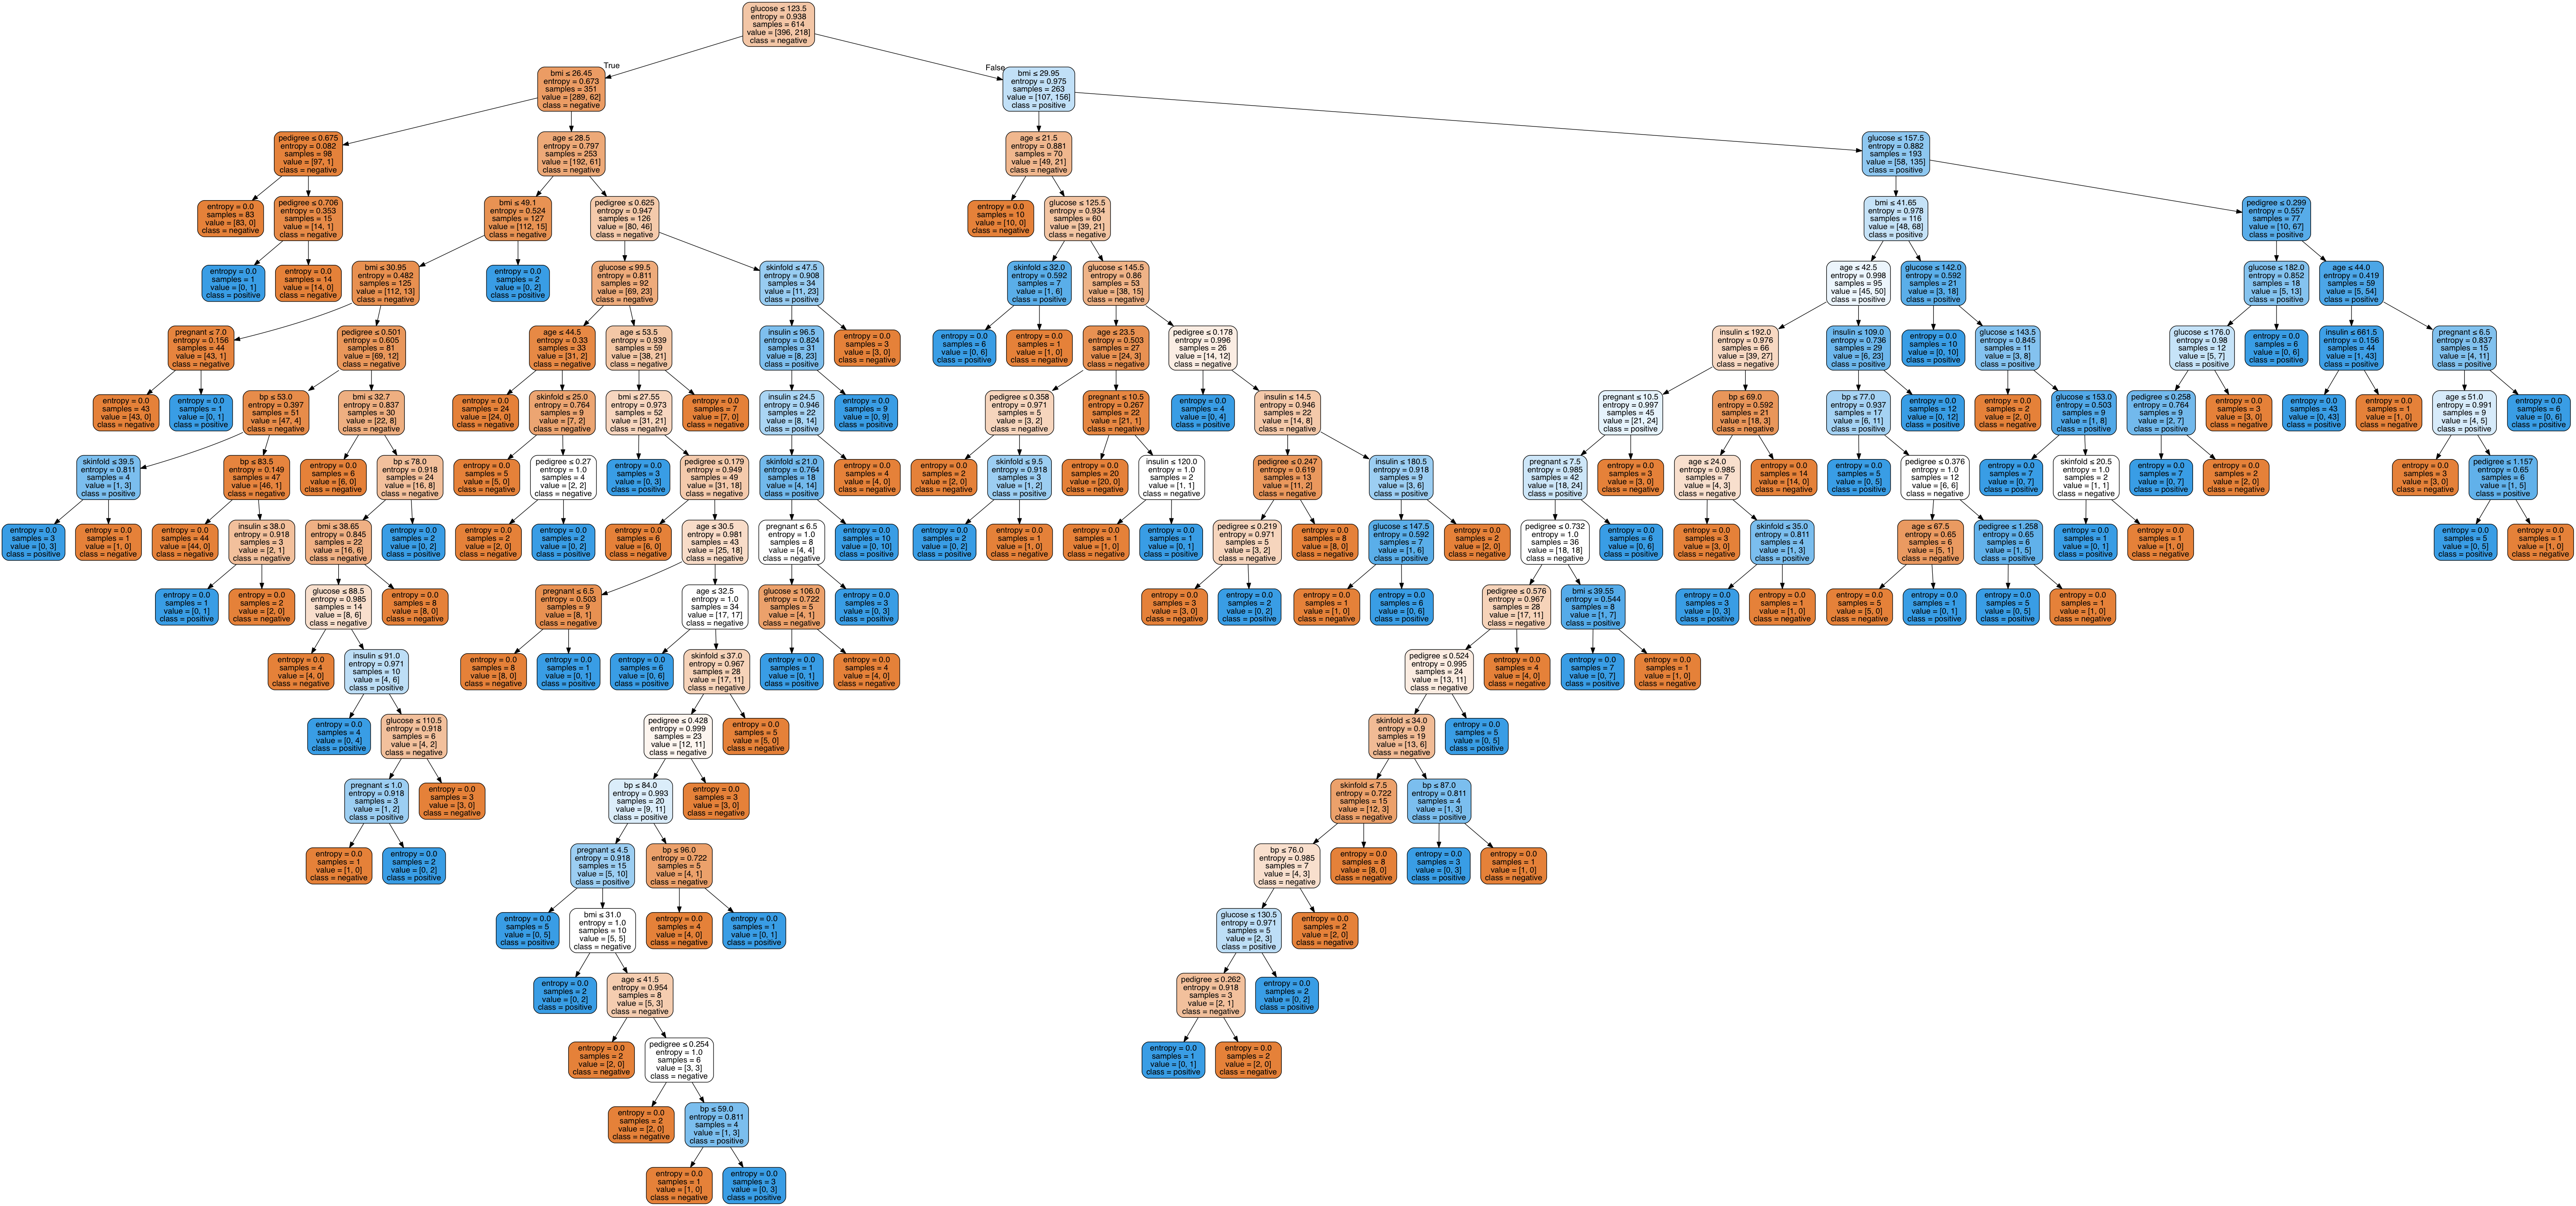

In [ ]:
from IPython.display import Image  
import pydotplus

dot_data = tree.export_graphviz(pima_clf, out_file="pima1.dot", 
                         feature_names=['pregnant', 'glucose', 'bp', 'skinfold', 'insulin', 'bmi', 'pedigree', 'age'],  
                         class_names=['negative', 'positive'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("pima1.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# try limit depth

from sklearn import tree
pima_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12)
pima_clf.fit(pima_train[['pregnant', 'glucose', 'bp', 'skinfold', 'insulin', 'bmi', 'pedigree', 'age']], pima_train['diabetes'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
pima_predictions = pima_clf.predict(pima_test[['pregnant', 'glucose', 'bp', 'skinfold', 'insulin', 'bmi', 'pedigree', 'age']])
from sklearn.metrics import accuracy_score
accuracy_score(pima_test['diabetes'], pima_predictions)


0.7467532467532467

# ADULT DATA SET

In [ ]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'wage']
cat_columns = ['workclass',  'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'wage']
cont_columns = ['age', 'fnlwgt', 'education-num',  'capital-gain', 'capital-loss', 'hours-per-week']



In [ ]:
# Pima
import pandas as pd
adult = pd.read_csv('../data/adult.data.txt', 
                   header=None, names=columns)
adult.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country    wage  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

## add boolean label column

In [ ]:
import numpy as np

#adult['over50'] = adult['wage'] != ' <=50K'
adult['over50'] = np.where(adult['wage'] == ' <=50K', 0, 1)

adult= adult.drop('wage', axis=1)

In [ ]:
adult

age          workclass  fnlwgt      education  education-num  \
0       39          State-gov   77516      Bachelors             13   
1       50   Self-emp-not-inc   83311      Bachelors             13   
2       38            Private  215646        HS-grad              9   
3       53            Private  234721           11th              7   
4       28            Private  338409      Bachelors             13   
5       37            Private  284582        Masters             14   
6       49            Private  160187            9th              5   
7       52   Self-emp-not-inc  209642        HS-grad              9   
8       31            Private   45781        Masters             14   
9       42            Private  159449      Bachelors             13   
10      37            Private  280464   Some-college             10   
11      30          State-gov  141297      Bachelors             13   
12      23            Private  122272      Bachelors             13   
13      32            Private  205019     Assoc-acdm             12   
14      40            Private  121772      Assoc-voc             11   
15      34            Private  245487        7th-8th              4   
16      25   Self-emp-not-inc  176756        HS-grad              9   
17      32            Private  186824        HS-grad              9   
18      38            Private   28887           11th              7   
19      43   Self-emp-not-inc  292175        Masters             14   
20      40            Private  193524      Doctorate             16   
21      54            Private  302146        HS-grad              9   
22      35        Federal-gov   76845            9th              5   
23      43            Private  117037           11th              7   
24      59            Private  109015        HS-grad              9   
25      56          Local-gov  216851      Bachelors             13   
26      19            Private  168294        HS-grad              9   
27      54                  ?  180211   Some-college             10   
28      39            Private  367260        HS-grad              9   
29      49            Private  193366        HS-grad              9   
...    ...                ...     ...            ...            ...   
32531   30                  ?   33811      Bachelors             13   
32532   34            Private  204461      Doctorate             16   
32533   54            Private  337992      Bachelors             13   
32534   37            Private  179137   Some-college             10   
32535   22            Private  325033           12th              8   
32536   34            Private  160216      Bachelors             13   
32537   30            Private  345898        HS-grad              9   
32538   38            Private  139180      Bachelors             13   
32539   71                  ?  287372      Doctorate             16   
32540   45          State-gov  252208        HS-grad              9   
32541   41                  ?  202822        HS-grad              9   
32542   72                  ?  129912        HS-grad              9   
32543   45          Local-gov  119199     Assoc-acdm             12   
32544   31            Private  199655        Masters             14   
32545   39          Local-gov  111499     Assoc-acdm             12   
32546   37            Private  198216     Assoc-acdm             12   
32547   43            Private  260761        HS-grad              9   
32548   65   Self-emp-not-inc   99359    Prof-school             15   
32549   43          State-gov  255835   Some-college             10   
32550   43   Self-emp-not-inc   27242   Some-college             10   
32551   32            Private   34066           10th              6   
32552   43            Private   84661      Assoc-voc             11   
32553   32            Private  116138        Masters             14   
32554   53            Private  321865        Masters             14   
32555   22            Private  

## Now one hot encode categorical columns

In [ ]:
for category in cat_columns[:-1]:
    print(category)
    one_hot = pd.get_dummies(adult[category])
    # drop the original Outlook column
    adult = adult.drop(category, axis=1)
    #  join the one hot columns to the quad dataframe
    adult = adult.join(one_hot, rsuffix=category)
adult = adult.dropna()   

workclass
education
marital-status
occupation
relationship
race
sex
native-country


In [ ]:
adult.columns


Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'over50', ' ?', ' Federal-gov', ' Local-gov',
       ...
       ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan',
       ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam',
       ' Yugoslavia'],
      dtype='object', length=109)

## divide data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
adult_train, adult_test = train_test_split(adult, test_size = 0.2)
adult_train_y = adult_train[['over50']]
adult_train_x = adult_train.drop('over50', axis=1)
adult_test_y = adult_test[['over50']]
adult_test_x = adult_test.drop('over50', axis=1)
adult_test_y.head()

over50
1446        0
19721       0
22667       1
27724       1
13699       0

## now build model

In [ ]:

from sklearn import tree
adult_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)
adult_model.fit(adult_train_x, adult_train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [ ]:
adult_predictions = adult_model.predict(adult_test_x)
from sklearn.metrics import accuracy_score
accuracy_score(adult_test_y, adult_predictions)


0.8564409642253954

# fine tune

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'max_depth': list(range(10,30))},]
decision_reg = tree.DecisionTreeClassifier(criterion='entropy')
grid_search = GridSearchCV(decision_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(adult_train_x, adult_train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [ ]:
grid_search.best_params_

{'max_depth': 10}

In [ ]:
accuracy_score = 0.8564
xp = 30 + min ( 60, (max( 0, (accuracy_score - 0.820) * 1100)))
xp

70.0400000000001